#Who do we target for Donations

- We have a dataset of people we approached for doners for our Election campaign
- We have their education, job, income, ethnicity 
- We know high income earners are better to approach for political donations

### Let's build a classifier that predicts income levels based on a person's attributes. 
Those will be the persons we appraoch first for political donations

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np


file_name=r'C:\Users\REEMA PASWAN\Downloads\Classification-Project-Finding-Donors-For-Charity-master\Classification-Project-Finding-Donors-For-Charity-master\adult.csv'
df=pd.read_csv(file_name)

In [2]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [4]:
df.shape

(32560, 15)

In [5]:
column_names = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']  

In [6]:
df=pd.DataFrame(df.values,columns=column_names)

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null object
workclass         32560 non-null object
fnlwgt            32560 non-null object
education         32560 non-null object
education-num     32560 non-null object
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null object
capital-loss      32560 non-null object
hours-per-week    32560 non-null object
native-country    32560 non-null object
Income            32560 non-null object
dtypes: object(15)
memory usage: 3.7+ MB


In [ ]:
###They're all object datatype, can Pandas automatically fix this?

In [11]:
# for conveting into real type of data
df=df.infer_objects()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2]:
# Exploratory Data Analysis

In [13]:
# Use strip to remove white space characters before and after our data

df['Income']=df['Income'].str.strip()

In [14]:
df['Income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: Income, Length: 32560, dtype: object

In [15]:
n_records=df.shape[0]

n_greater_50k=df[df['Income']=='>50K'].shape[0]

n_at_most_50k=df[df['Income']=='<=50K'].shape[0]

greater_percent=(n_greater_50k/n_records)*100



In [16]:
n_records

32560

In [17]:
print('Individuals making more than 50K:{}'.format(n_greater_50k))

Individuals making more than 50K:7841


In [18]:
print('Individuals making less than 50K or equal to 50K:{}'.format(n_at_most_50k))

Individuals making less than 50K or equal to 50K:24719


In [19]:
greater_percent

24.081695331695332

In [20]:
#Vistalizations

C:\Users\REEMA PASWAN\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


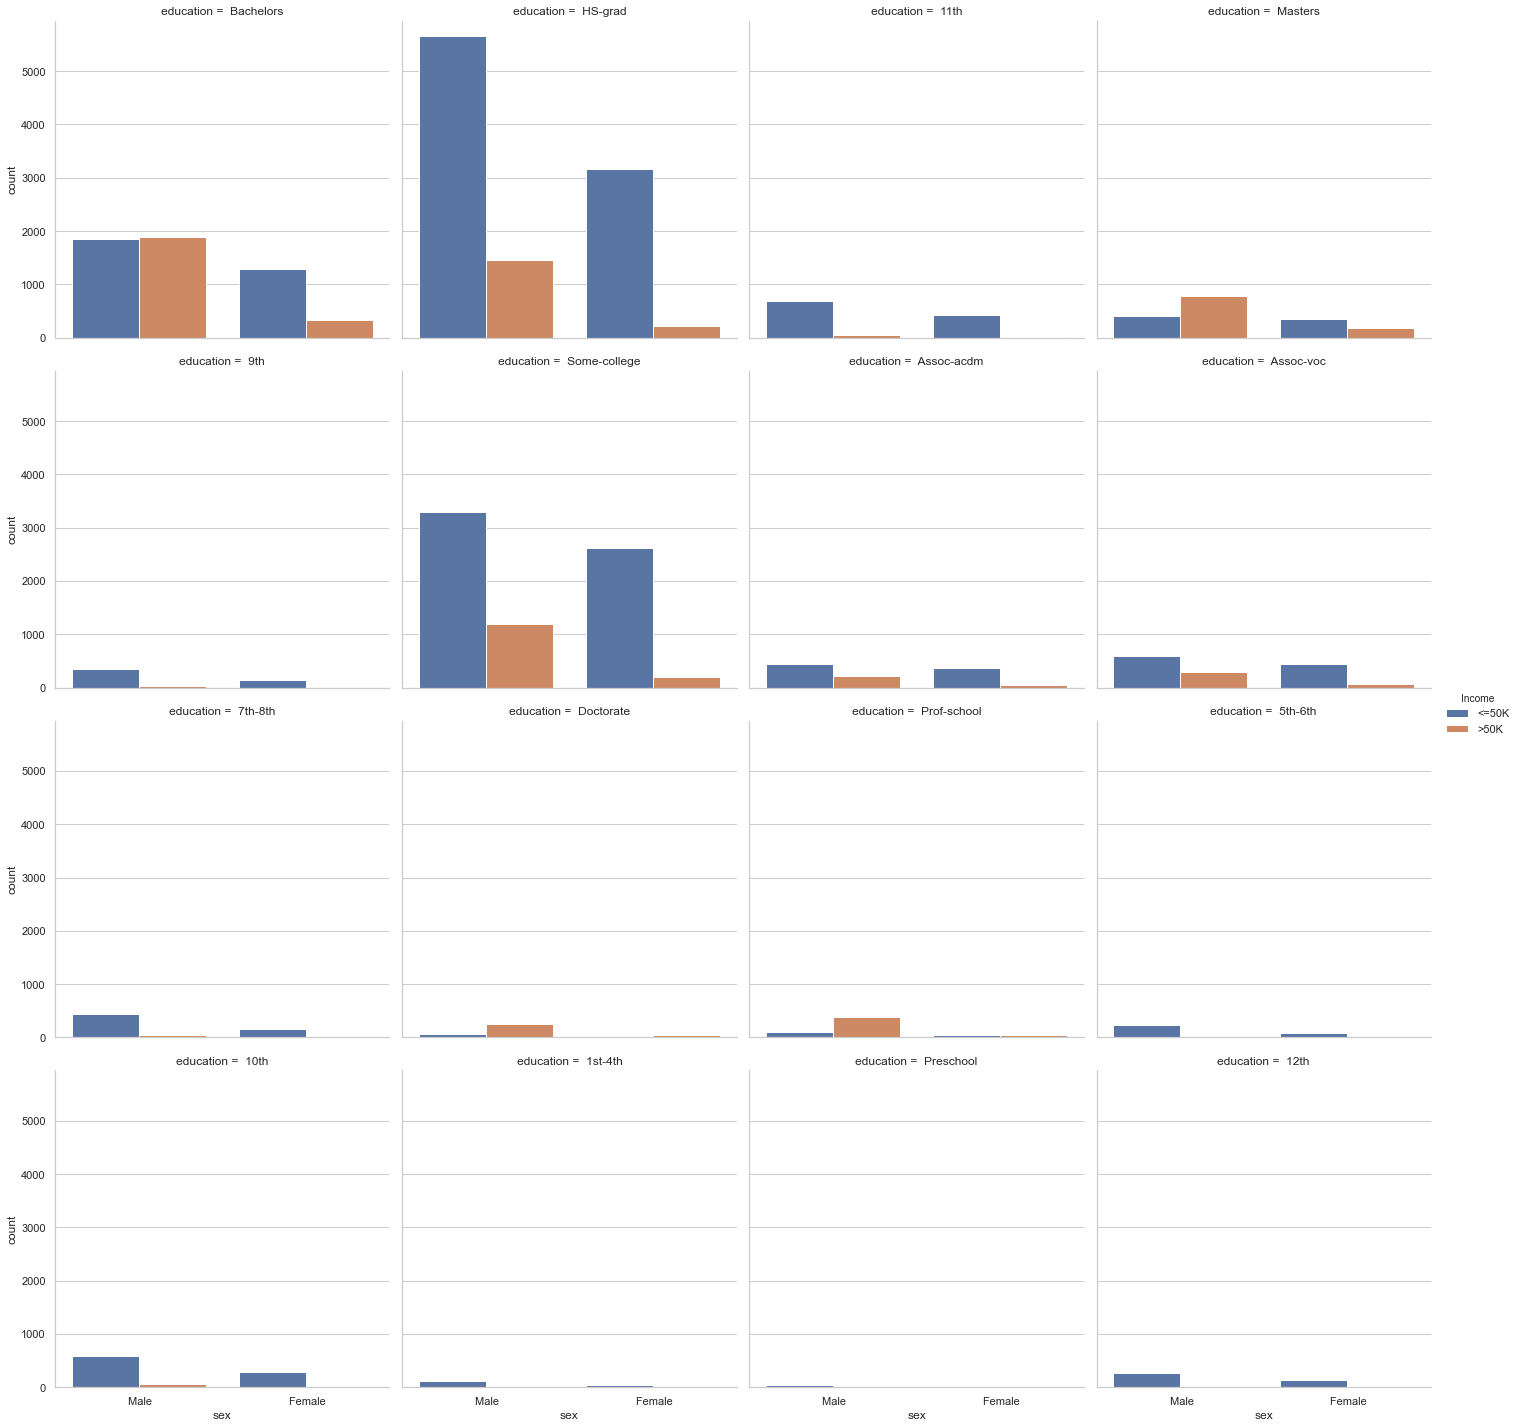

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='whitegrid',color_codes=True)
sns.factorplot("sex",col='education',data=df,hue='Income',kind='count',col_wrap=4)

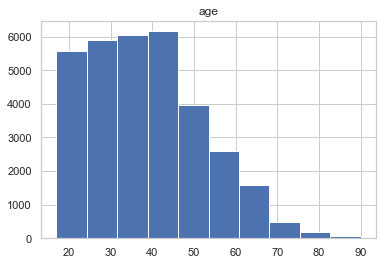

In [22]:
df.hist(column='age')
plt.show()

In [23]:
df.drop(['fnlwgt'],axis=1,inplace=True)

In [24]:
df[df['occupation']==' ?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [25]:
df[df['workclass']==' ?']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [26]:
df=df[df['workclass']!= ' ?']
df=df[df['occupation']!=' ?']
df=df[df['native-country']!=' ?']

In [27]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [28]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [29]:
#Prepare our data for Modelling/Preprocessing

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
numerical=['age','education-num','capital-gain','capital-loss','hours-per-week']
df[numerical]=scaler.fit_transform(df[numerical])

In [32]:
df[numerical]

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.452055,0.800000,0.000000,0.0,0.122449
1,0.287671,0.533333,0.000000,0.0,0.397959
2,0.493151,0.400000,0.000000,0.0,0.397959
3,0.150685,0.800000,0.000000,0.0,0.397959
4,0.273973,0.866667,0.000000,0.0,0.397959
...,...,...,...,...,...
32555,0.136986,0.733333,0.000000,0.0,0.377551
32556,0.315068,0.533333,0.000000,0.0,0.397959
32557,0.561644,0.533333,0.000000,0.0,0.397959
32558,0.068493,0.533333,0.000000,0.0,0.193878


In [31]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,<=50K
2,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959,United-States,<=50K
3,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959,Cuba,<=50K
4,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959,United-States,<=50K


In [33]:
y=df['Income']

In [34]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Income, dtype: object

In [35]:
df.drop('Income',axis=1,inplace=True)

In [36]:
df.head(2)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449,United-States
1,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959,United-States


In [37]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32555    <=50K
32556     >50K
32557    <=50K
32558    <=50K
32559     >50K
Name: Income, Length: 30161, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y=y.apply(lambda x:0 if x=='<=50K' else 1)

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30161, dtype: int64

In [40]:
X = pd.get_dummies(df)
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.493151,0.400000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.150685,0.800000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.866667,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [42]:
#Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train))

0.980106100795756


In [67]:
prediction=dt.predict(X_test)

In [68]:
list(prediction)


[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [69]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [70]:
accuracy_dt

81.43441264228092

In [71]:
#manually verify it has wrongly predicted
dt.predict(X_test[2:3])

array([1], dtype=int64)

#HyperTuning of DT

In [ ]:
# we can't check with parameters one by one after getting the accuracy so we use gridsearchcv for increasing the accuraccy

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters={'min_samples_split':range(10,500,20),'max_depth':range(1,20,2),'criterion':['gini','entropy']}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                      

In [52]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=90,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
clf_predict=clf.predict(X_test)

In [54]:
accuracy_score(clf_predict,Y_test)

0.8499281688584374

In [55]:
#Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,Y_train)
print(log.score(X_train,Y_train))
log

C:\Users\REEMA PASWAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8465327775672603


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
log_test=log.predict(X_test)

In [85]:
log_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
accuracy_score(log_test,Y_test)

0.8476074704387225

In [87]:
log.predict(X_test[2:3])

array([0], dtype=int64)

In [61]:
model=LogisticRegression(max_iter=1000)
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l2']
c_values=[100, 10, 1.0, 0.1, 0.01, 0.001]

parameters=dict(solver=solvers,penalty=penalty,C=c_values)

grid_search_log=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
grid_search_log.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
grid_search_log.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
grid_search_log.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [64]:
grid_log=grid_search_log.predict(X_test)

In [65]:
accuracy_score(grid_log,Y_test)

0.8492651121670903

In [ ]:
# now we have given the best estimators

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(min_samples_split=90,max_depth=11,criterion='gini')
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train))

0.8629689276241


In [73]:
prediction=dt.predict(X_test)

In [74]:
list(prediction)


[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [75]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [76]:
accuracy_dt

84.99281688584374

In [77]:
#manually verify
dt.predict(X_test[2:3])

array([0], dtype=int64)

In [78]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=100,solver='newton-cg')
log.fit(X_train,Y_train)
print(log.score(X_train,Y_train))
log

0.848664266767715


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
log_test=log.predict(X_test)

In [80]:
log_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
accuracy_score(log_test,Y_test)

0.8492651121670903

In [82]:
log.predict(X_test[2:3])

array([0], dtype=int64)